# 전달용 데이터 및 유용한 함수
node id RICOHS는 각각 주거지, 공업구역, 상업구역, 오피스, 허브, 단순 교차로를 의미합니다. 

coords의 단위는 km입니다. 

adj는 인접 행렬

random_prob는 시뮬레이션 실행 시 랜덤 수요량을 모델링하는 딕셔너리입니다. 

예측 시 사용하시면 **안 되는** 값입니다.

아래 나열된 데이터들은 모두 설정값을 의미합니다.

### 13버전 업데이트: idx map
edge idx map, node idx map은 13버전 이후 추가된 기능입니다. 

(0, 7) 노드 사이 edge의 id가 궁금하다면 edge_idx_map(0, 7)로 쿼리하시면 됩니다. 

0번 id의 edge가 궁금하다면 반대로 node_idx_map(0)으로 쿼리하시면 됩니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from math import ceil

In [ ]:
# 맵 생성 정보
converted_nodes = [{'id': 0, 'type': 'H', 'coords': (10, 10)}, {'id': 1, 'type': 'I', 'coords': (5, 8)}, {'id': 2, 'type': 'S', 'coords': (7, 2)}, {'id': 3, 'type': 'C', 'coords': (6, 0)}, {'id': 4, 'type': 'S', 'coords': (2, 7)}, {'id': 5, 'type': 'C', 'coords': (5, 0)}, {'id': 6, 'type': 'S', 'coords': (2, 2)}, {'id': 7, 'type': 'I', 'coords': (4, 9)}, {'id': 8, 'type': 'O', 'coords': (1, 1)}, {'id': 9, 'type': 'C', 'coords': (5, 1)}, {'id': 10, 'type': 'R', 'coords': (7, 1)}, {'id': 11, 'type': 'R', 'coords': (9, 3)}, {'id': 12, 'type': 'I', 'coords': (4, 8)}, {'id': 13, 'type': 'S', 'coords': (7, 7)}, {'id': 14, 'type': 'C', 'coords': (8, 4)}, {'id': 15, 'type': 'O', 'coords': (2, 1)}, {'id': 16, 'type': 'R', 'coords': (8, 1)}, {'id': 17, 'type': 'R', 'coords': (8, 2)}, {'id': 18, 'type': 'C', 'coords': (1, 3)}, {'id': 19, 'type': 'R', 'coords': (9, 4)}]
converted_edges = [{'start': 0, 'end': 7, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 7, 'end': 0, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 1, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 1, 'distance': 2.0, 'road_type': 'urban'}, {'start': 2, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 2, 'distance': 10.0, 'road_type': 'highway'}, {'start': 2, 'end': 17, 'distance': 2.0, 'road_type': 'urban'}, {'start': 17, 'end': 2, 'distance': 2.0, 'road_type': 'urban'}, {'start': 3, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 3, 'distance': 2.0, 'road_type': 'urban'}, {'start': 4, 'end': 6, 'distance': 10.0, 'road_type': 'highway'}, {'start': 6, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 4, 'end': 7, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 7, 'end': 4, 'distance': 5.656854249492381, 'road_type': 'urban'}, {'start': 4, 'end': 13, 'distance': 10.0, 'road_type': 'highway'}, {'start': 13, 'end': 4, 'distance': 10.0, 'road_type': 'highway'}, {'start': 5, 'end': 6, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 5, 'end': 9, 'distance': 2.0, 'road_type': 'urban'}, {'start': 9, 'end': 5, 'distance': 2.0, 'road_type': 'urban'}, {'start': 5, 'end': 15, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 15, 'end': 5, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 5, 'end': 17, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 17, 'end': 5, 'distance': 7.211102550927978, 'road_type': 'urban'}, {'start': 6, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 6, 'distance': 2.0, 'road_type': 'urban'}, {'start': 6, 'end': 18, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 18, 'end': 6, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 7, 'end': 12, 'distance': 2.0, 'road_type': 'urban'}, {'start': 12, 'end': 7, 'distance': 2.0, 'road_type': 'urban'}, {'start': 8, 'end': 15, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 8, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 16, 'distance': 2.0, 'road_type': 'urban'}, {'start': 16, 'end': 10, 'distance': 2.0, 'road_type': 'urban'}, {'start': 10, 'end': 17, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 17, 'end': 10, 'distance': 2.8284271247461903, 'road_type': 'urban'}, {'start': 11, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 11, 'distance': 2.0, 'road_type': 'urban'}, {'start': 13, 'end': 14, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 13, 'distance': 6.324555320336759, 'road_type': 'urban'}, {'start': 14, 'end': 17, 'distance': 4.0, 'road_type': 'urban'}, {'start': 17, 'end': 14, 'distance': 4.0, 'road_type': 'urban'}, {'start': 14, 'end': 18, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 18, 'end': 14, 'distance': 14.142135623730951, 'road_type': 'urban'}, {'start': 14, 'end': 19, 'distance': 2.0, 'road_type': 'urban'}, {'start': 19, 'end': 14, 'distance': 2.0, 'road_type': 'urban'}, {'start': 15, 'end': 17, 'distance': 12.165525060596439, 'road_type': 'urban'}, {'start': 17, 'end': 15, 'distance': 12.165525060596439, 'road_type': 'urban'}]

adj = [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0.],
 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0.],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1.],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0.]]

random_prob = {'R': 0.16,
               'I': 0.1,
               'C': 0.1,
               'O': 0.1,
               'H': 0.3,
               'S': 0.0,
               'day_night_ratio':0.25,
               'step_of_visit':10}

edge_idx_map = {(0, 7): 0, (7, 0): 1, (1, 12): 2, (12, 1): 3, (2, 6): 4, (6, 2): 5, (2, 13): 6, (13, 2): 7, (2, 17): 8, (17, 2): 9, (3, 5): 10, (5, 3): 11, (4, 6): 12, (6, 4): 13, (4, 7): 14, (7, 4): 15, (4, 13): 16, (13, 4): 17, (5, 6): 18, (6, 5): 19, (5, 9): 20, (9, 5): 21, (5, 15): 22, (15, 5): 23, (5, 17): 24, (17, 5): 25, (6, 15): 26, (15, 6): 27, (6, 18): 28, (18, 6): 29, (7, 12): 30, (12, 7): 31, (8, 15): 32, (15, 8): 33, (10, 16): 34, (16, 10): 35, (10, 17): 36, (17, 10): 37, (11, 19): 38, (19, 11): 39, (13, 14): 40, (14, 13): 41, (14, 17): 42, (17, 14): 43, (14, 18): 44, (18, 14): 45, (14, 19): 46, (19, 14): 47, (15, 17): 48, (17, 15): 49}
node_idx_map = {0: (0, 7), 1: (7, 0), 2: (1, 12), 3: (12, 1), 4: (2, 6), 5: (6, 2), 6: (2, 13), 7: (13, 2), 8: (2, 17), 9: (17, 2), 10: (3, 5), 11: (5, 3), 12: (4, 6), 13: (6, 4), 14: (4, 7), 15: (7, 4), 16: (4, 13), 17: (13, 4), 18: (5, 6), 19: (6, 5), 20: (5, 9), 21: (9, 5), 22: (5, 15), 23: (15, 5), 24: (5, 17), 25: (17, 5), 26: (6, 15), 27: (15, 6), 28: (6, 18), 29: (18, 6), 30: (7, 12), 31: (12, 7), 32: (8, 15), 33: (15, 8), 34: (10, 16), 35: (16, 10), 36: (10, 17), 37: (17, 10), 38: (11, 19), 39: (19, 11), 40: (13, 14), 41: (14, 13), 42: (14, 17), 43: (17, 14), 44: (14, 18), 45: (18, 14), 46: (14, 19), 47: (19, 14), 48: (15, 17), 49: (17, 15)}



# 메인 데이터셋
메인 데이터셋은 traffic_dataset.npy로 따로 전달했습니다. 

[num steps, num nodes, num nodes, channels] 의 형태를 갖습니다. 

하루가 8시간인 세계, 70일을 시뮬레이션(=10주), 데이터 기록은 1분마다 이루어집니다. 

현실 데이터는 한 시간마다 기록이지만, 우리 세계는 8시간이 하루이므로 스케일링을 적용한 결과입니다. 

즉 num step은 35 x 8 x 60 = 33600 이 됩니다. 

상황에 따라 5분 간격으로 변경하셔서 사용하셔도 됩니다. (일단 구현은 해놨습니다.)

변경 방법은 아래 다룹니다. 

# 유용한 함수
plot 함수를 첨부합니다. 

river_info는 강을 그리기 위해 사용되는 값입니다. 시뮬레이션에는 큰 영향을 주지 않습니다. 

plot_city_directed_traffic, plot_city_undirected_traffic 두 가지 함수가 있습니다. 

각 함수의 차이는, 도로의 양방향을 표시할지, 두 방향을 통합해서 나타낼지입니다. 

In [3]:
river_info = (np.array([ 0.        ,  2.5       ,  3.33333333,  6.66666667,  7.5       ,
       10.        ]), np.array([6.86811936, 6.86811936, 6.45145269, 6.45145269, 6.03478602,
       6.03478602]), 1.6977288245972708)

In [4]:
# plot 함수 2종 update for 13
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_time_info_generalized(time_step, steps_per_day=480, timestep_minutes=1):
    """
    time_step 위치가 전체 시뮬레이션에서 몇 번째 스텝인지 주어졌을 때,
    (day, hour, minute) 튜플을 반환.
      - steps_per_day: 하루를 구성하는 스텝 수 (예: 480)
      - timestep_minutes: 1스텝이 몇 분에 해당하는지 (예: 1)
    """
    # 며칠째인지
    day = time_step // steps_per_day + 1

    # 하루 중 경과한 분(minutes)
    minute_of_day = (time_step % steps_per_day) * timestep_minutes

    # 시(hour)와 분(minute) 계산
    hour = minute_of_day // 60
    minute = minute_of_day % 60

    return day, int(hour), int(minute)


def get_background_color_generalized(time_step, steps_per_day=480):
    """
    time_step 기준으로 하루 중 경과한 스텝의 비율에 따라 배경색(gray scale)을 반환.
    - fraction = (time_step % steps_per_day) / steps_per_day
    - fraction < 3/16      : dark (0.3)
    - 3/16 ≤ fraction ≤ 5/16 : fade-in (0.3 → 1.0)
    - 5/16 < fraction < 11/16: bright (1.0)
    - 11/16 ≤ fraction ≤ 13/16: fade-out (1.0 → 0.3)
    - 그 외                 : dark (0.3)
    """
    # 하루 중 스텝 비율 (0.0 ~ 1.0)
    frac = (time_step % steps_per_day) / steps_per_day

    dark = 0.3
    bright = 1.0

    if frac < 3/16:
        c = dark
    elif frac <= 5/16:
        # 3/16 → 5/16 구간에서 선형 보간
        # normalize: (frac - 3/16) / (2/16) = (16*frac - 3) / 2
        interp = (16*frac - 3) / 2
        c = dark + interp * (bright - dark)
    elif frac < 11/16:
        c = bright
    elif frac <= 13/16:
        # 11/16 → 13/16 구간에서 선형 보간 (fade-out)
        # normalize: (frac - 11/16) / (2/16) = (16*frac - 11) / 2
        interp = (16*frac - 11) / 2
        c = bright - interp * (bright - dark)
    else:
        c = dark

    return (c, c, c)



def plot_city_directed_traffic_sim13(simulation, time_step, river_info,
                                     city_size=10, save=False, output_dir='figures'):
    """
    sim13 환경에 맞는 방향 그래프 시각화.
    - simulation.traffic_data의 shape는 (T, E, C)로, 여기서는 채널 0 (volume)을 표시합니다.
    - 시간 해상도는 simulation.steps_per_day 스텝(기본 480스텝)이 하루입니다.
    """
    # 시간 정보
    day, hour, minute = get_time_info_generalized(time_step, simulation.steps_per_day, timestep_minutes=simulation.timestep_minutes)
    time_str = f"Time Step {time_step} | Day: {day}, {hour:02d}:{minute:02d}"

    # 배경색
    bg_color = get_background_color_generalized(time_step, steps_per_day=simulation.steps_per_day)

    # 데이터 준비: traffic_data 채널 0 (volume)
    volumes = simulation.traffic_data[time_step, :, 0]  # (E,)

    # 노드 위치 및 색상
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    color_mapping = {
        'R':'lightgreen', 'I':'yellow', 'C':'blue',
        'O':'skyblue', 'S':'darkgray', 'H':'orange'
    }
    for nd in simulation.nodes:
        nid = nd['id']
        ntype = nd['type']
        x, y = nd['coords']
        G.add_node(nid)
        pos[nid] = (x, y)
        node_colors.append(color_mapping.get(ntype, 'black'))

    # 간선 굵기·레이블
    edgelist = []
    widths = []
    labels = {}
    for idx, e in enumerate(simulation.edges):
        u, v = e['start'], e['end']
        G.add_edge(u, v)
        flow = volumes[idx]
        w = 3 if flow >= 1 else 1
        edgelist.append((u, v))
        widths.append(w)
        labels[(u, v)] = f"{int(flow)}" if flow >= 1 else ""

    # 그림 그리기
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_facecolor(bg_color)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3)
    ax.set_xticks(np.arange(0, city_size+1, 1))
    ax.set_yticks(np.arange(0, city_size+1, 1))

    # 강 표시
    xs, ys, river_width = river_info
    ax.plot(xs, ys, color='cadetblue', linewidth=river_width*5, alpha=1.0)

    # 방향 간선
    nx.draw_networkx_edges(
        G, pos,
        edgelist=edgelist,
        width=widths,
        edge_color='black',
        alpha=0.7,
        arrows=True,
        arrowstyle='->',
        arrowsize=15,
        connectionstyle='arc3, rad=0.1',
        ax=ax
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=labels,
        font_color='black',
        font_size=9,
        label_pos=0.5,
        ax=ax
    )
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=500,
        edgecolors='black',
        ax=ax
    )
    nx.draw_networkx_labels(
        G, pos,
        font_size=10, font_color='black', font_weight='bold', ax=ax
    )

    plt.title("Directed City Traffic Map (sim13)", fontsize=16)
    plt.suptitle(time_str, fontsize=12)
    ax.set_xlim(-1, city_size+1)
    ax.set_ylim(-1, city_size+1)
    plt.axis('on')

    if save:
        import os
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, f"{time_step}_directed.png"),
                    dpi=300, bbox_inches='tight')
    plt.show()


def plot_city_undirected_traffic_sim13(simulation, time_step, river_info,
                                       city_size=10, save=False, output_dir='figures'):
    """
    sim13 환경에 맞는 언디렉티드 그래프 시각화.
    - (u->v)와 (v->u) 채널 0(volume)을 합산해 단일 간선으로 표시합니다.
    """
    # 시간 정보
    day, hour, minute = get_time_info_generalized(time_step, simulation.steps_per_day, timestep_minutes=simulation.timestep_minutes)
    time_str = f"Time Step {time_step} | Day: {day}, {hour:02d}:{minute:02d}"
    bg_color = get_background_color_generalized(time_step, steps_per_day=simulation.steps_per_day)

    # traffic_data 채널 0 (volume)
    volumes = simulation.traffic_data[time_step, :, 0]  # (E,)

    # 노드 셋업
    G = nx.Graph()
    pos = {}
    node_colors = []
    color_mapping = {'R':'lightgreen','I':'yellow','C':'blue',
                     'O':'skyblue','S':'darkgray','H':'orange'}
    for nd in simulation.nodes:
        nid = nd['id']
        ntype = nd['type']
        x, y = nd['coords']
        G.add_node(nid)
        pos[nid] = (x, y)
        node_colors.append(color_mapping.get(ntype, 'black'))

    # 무향 간선별 합산
    edge_sum = {}
    for idx, e in enumerate(simulation.edges):
        u, v = e['start'], e['end']
        key = tuple(sorted((u, v)))
        edge_sum.setdefault(key, 0)
        edge_sum[key] += volumes[idx]

    edgelist = []
    widths = []
    labels = {}
    for (u, v), flow in edge_sum.items():
        G.add_edge(u, v)
        w = 3 if flow >= 1 else 1
        edgelist.append((u, v))
        widths.append(w)
        labels[(u, v)] = f"{int(flow)}" if flow >= 1 else ""

    # 그림 그리기
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_facecolor(bg_color)
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.3)
    ax.set_xticks(np.arange(0, city_size+1, 1))
    ax.set_yticks(np.arange(0, city_size+1, 1))

    # 강 표시
    xs, ys, river_width = river_info
    ax.plot(xs, ys, color='cadetblue', linewidth=river_width*5, alpha=1.0)

    nx.draw_networkx_edges(
        G, pos,
        edgelist=edgelist,
        width=widths,
        edge_color='black',
        alpha=0.7,
        ax=ax
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=labels,
        font_color='black',
        font_size=9,
        label_pos=0.5,
        ax=ax
    )
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=500,
        edgecolors='black',
        ax=ax
    )
    nx.draw_networkx_labels(
        G, pos,
        font_size=10, font_color='black', font_weight='bold', ax=ax
    )

    plt.title("Undirected City Traffic (sim13)", fontsize=14)
    plt.suptitle(time_str, fontsize=11)
    ax.set_xlim(-1, city_size+1)
    ax.set_ylim(-1, city_size+1)
    plt.axis('on')

    if save:
        import os
        os.makedirs(output_dir, exist_ok=True)
        plt.savefig(os.path.join(output_dir, f"{time_step}_undirected.png"),
                    dpi=300, bbox_inches='tight')
    plt.show()


# 메인 시뮬레이션 클래스
시뮬레이션 클래스와 차량 클래스 두 가지로 나뉘어 구현되어 있습니다. 

현재 버전 11까지 업데이트되었고, 자잘한 업데이트를 이제부터 할 예정입니다. 

혹시 돌리고 싶으시면 돌려보세요. 

직접 데이터셋을 얻으실 수 있습니다. 

다만, 제가 전달한 데이터셋과 동일합니다. 

In [5]:
# vehicle, sim 13
import numpy as np
import networkx as nx
from math import ceil
from collections import deque

# =============================================================================
# Vehicle_12 재사용
# =============================================================================
class Vehicle_12:
    def __init__(self, vid, route_type, path_out, departure_time,
                 origin_node, dest_node, step_of_visit):
        self.id = vid
        self.reset(route_type, path_out, departure_time,
                   origin_node, dest_node, step_of_visit)
        self.dt = None
        self.history = []

    def reset(self, route_type, path_out, departure_time,
              origin_node, dest_node, step_of_visit):
        """풀에서 재사용할 때 내부 상태를 초기화"""
        self.route_type     = route_type
        self.path           = path_out
        self.departure_time = departure_time
        self.origin_node    = origin_node
        self.dest_node      = dest_node
        self.step_of_visit  = step_of_visit

        self.current_link_index = 0
        self.remaining_steps    = path_out[0]['basic_steps'] if path_out else 0

        self.phase        = "outbound"
        self.finished     = False
        self.returned     = False
        self.waiting_steps= 0

    def get_current_link(self):
        return self.path[self.current_link_index] if self.current_link_index < len(self.path) else None

    def get_current_location(self):
        info = f"Vehicle {self.id} | {self.route_type} | "
        if self.returned:
            return info + f"[Returned] Origin {self.origin_node}"
        if self.phase == "waiting":
            return info + f"[Waiting at {self.dest_node} (remain={self.waiting_steps})]"
        if self.finished:
            if self.path:
                final = self.path[-1]['end']
                return info + (f"[Returned] Node {final}" if self.phase=="returning" else f"[Arrived] Node {final}")
            return info + "[Arrived with empty path]"
        link = self.get_current_link()
        if link and self.remaining_steps > 0:
            return info + f"Edge {link['start']}->{link['end']} (remain={self.remaining_steps})"
        return info + "[Transition]"

    def step(self, t, simulation):
        if t < self.departure_time or self.returned:
            self.history.append(self.get_current_location())
            return
        if self.phase in ["outbound", "returning"]:
            self._move_path(t, simulation)
        elif self.phase == "waiting":
            if self.waiting_steps > 0:
                self.waiting_steps -= 1
        self.history.append(self.get_current_location())

    def _move_path(self, t, simulation):
        if self.finished:
            return
        if self.remaining_steps == 0:
            self.current_link_index += 1
            if self.current_link_index < len(self.path):
                link = self.path[self.current_link_index]
                eff, _ = simulation.compute_effective_steps(link, t)
                self.dt = eff
                self.remaining_steps = eff
            else:
                self.finished = True
                return
        if self.remaining_steps > 0:
            self.remaining_steps -= 1

# =============================================================================
# SimpleSimulation_13: traffic_data를 (T, E, C) 형태로 반환
# =============================================================================
class SimpleSimulation_13:
    def __init__(self, converted_nodes, converted_edges, random_prob,
                 timestep_minutes=1, basic_spawn_count=5, num_days=2,
                 start_day="mon", basic_interval=10):
        # 노드, 엣지 정보
        self.nodes = converted_nodes
        self.edges = self.add_travel_time_to_edges(converted_edges, timestep_minutes)
        self.random_prob = random_prob
        self.step_of_visit = random_prob.get('step_of_visit', 10)
        self.basic_spawn_count = basic_spawn_count
        self.basic_interval = basic_interval

        # 에지 개수
        self.E = len(self.edges)
        # 에지 인덱스 매핑: (u,v) -> idx
        self.edge_index_map = {(e['start'], e['end']): i for i, e in enumerate(self.edges)}
        # 특징 채널 수 (vol, density, flow, ADT, TTI)
        self.C = 5

        # 시뮬레이션 설정
        self.steps_per_day = 480  # 8시간제
        self.num_days = num_days
        self.timestep_minutes = timestep_minutes
        self.total_timesteps = self.steps_per_day * self.num_days

        # traffic_data: (T, E, C)
        self.traffic_data = np.zeros((self.total_timesteps, self.E, self.C), dtype=float)

        # 그래프 구성
        self.G = nx.DiGraph()
        for idx, e in enumerate(self.edges):
            u, v = e['start'], e['end']
            self.G.add_edge(u, v, weight=e['basic_steps'], link_data=e)

        # Vehicle 풀
        self.vehicle_pool = deque()
        self.vehicles = []
        self.next_vid = 0

        # 요일 설정
        self.days = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
        self.start_day_index = self.days.index(start_day)
        self.weekend_multiplier = 1.25

    def add_travel_time_to_edges(self, edges, timestep_minutes):
        out = []
        for e in edges:
            d = e['distance']
            speed = 100 if e['road_type'] == 'highway' else 60
            tm = d * (60 / speed)
            steps = max(1, ceil(tm / timestep_minutes))
            ne = e.copy()
            ne['basic_steps'] = steps
            out.append(ne)
        return out

    def get_current_weekday(self, t):
        idx = (self.start_day_index + t // self.steps_per_day) % 7
        return self.days[idx]

    def acquire_vehicle(self, route_type, path_out, departure_time,
                        origin_node, dest_node, step_of_visit):
        if self.vehicle_pool:
            v = self.vehicle_pool.popleft()
            v.reset(route_type, path_out, departure_time,
                    origin_node, dest_node, step_of_visit)
        else:
            v = Vehicle_12(self.next_vid, route_type, path_out,
                           departure_time, origin_node, dest_node, step_of_visit)
            self.next_vid += 1
            self.vehicles.append(v)
        return v

    def get_shortest_path_links(self, s, t):
        try:
            path = nx.dijkstra_path(self.G, s, t, weight='weight')
        except nx.NetworkXNoPath:
            return []
        links = []
        for i in range(len(path) - 1):
            links.append(self.G[path[i]][path[i+1]]['link_data'])
        return links

    def compute_effective_steps(self, link, t):
        u, v = link['start'], link['end']
        bs = link['basic_steps']
        dist = link['distance']
        lanes = 4 if link['road_type'] == 'highway' else 2
        # 현재 볼륨
        idx = self.edge_index_map[(u, v)]
        vol = self.traffic_data[t, idx, 0]
        density = vol / (dist * lanes) if dist * lanes > 0 else 0
        kmax = 130 if link['road_type'] == 'highway' else 35
        eff = round(bs * (1 + 0.15 * ((density / kmax) ** 4)))
        return eff, density

    def record_traffic(self, t):
        # 1) 차량별 통행량(vol) 및 ADT 누적
        for v in self.vehicles:
            if v.returned or t < v.departure_time:
                continue
            link = v.get_current_link()
            if link and not v.finished:
                u, w = link['start'], link['end']
                idx = self.edge_index_map[(u, w)]
                self.traffic_data[t, idx, 0] += 1  # volume
                dt = v.dt if v.dt is not None else link['basic_steps']
                self.traffic_data[t, idx, 3] += dt  # ADT

        # 2) 밀도, 흐름, TTI 계산
        for idx, e in enumerate(self.edges):
            u, v = e['start'], e['end']
            vol = self.traffic_data[t, idx, 0]
            basic = e['basic_steps']
            adt = (self.traffic_data[t, idx, 3] / vol) if vol > 0 else basic
            lanes = 4 if e['road_type'] == 'highway' else 2
            density = vol / (e['distance'] * lanes) if e['distance'] * lanes > 0 else 0
            eff_spd = (e['distance'] * 60) / adt if adt > 0 else 0
            flow = density * eff_spd
            tti = adt / basic if basic > 0 else 1

            self.traffic_data[t, idx, 1] = density
            self.traffic_data[t, idx, 2] = flow
            self.traffic_data[t, idx, 3] = adt
            self.traffic_data[t, idx, 4] = tti

    def spawn_commute_basic(self, t, rng):
        if self.get_current_weekday(t) in ("sat", "sun"): return
        half = self.basic_interval // 2
        for nd in self.nodes:
            if nd['type'] != 'R': continue
            base = (t // self.steps_per_day) * self.steps_per_day
            scheduled = base + 60
            if scheduled - half <= t <= scheduled + half:
                interval = float(self.basic_interval)
                for k in range(self.basic_spawn_count):
                    offset = -half + (k + 0.5) * (interval / self.basic_spawn_count)
                    st = int(round(scheduled + offset))
                    if t != st: continue
                    ico = [x['id'] for x in self.nodes if x['type'] in ['I', 'C', 'O']]
                    if not ico: continue
                    dest = int(rng.choice(ico))
                    path = self.get_shortest_path_links(nd['id'], dest)
                    if not path: continue
                    self.acquire_vehicle("basic_commute", path, t,
                                         nd['id'], dest, self.step_of_visit)

    def spawn_industrial_basic(self, t, rng):
        if self.get_current_weekday(t) in ("sat", "sun"): return
        half = self.basic_interval // 2
        for nd in self.nodes:
            if nd['type'] != 'I': continue
            base = (t // self.steps_per_day) * self.steps_per_day
            scheduled = base + 30
            if scheduled - half <= t <= scheduled + half:
                interval = float(self.basic_interval)
                for k in range(self.basic_spawn_count):
                    offset = -half + (k + 0.5) * (interval / self.basic_spawn_count)
                    st = int(round(scheduled + offset))
                    if t != st: continue
                    cns = [x['id'] for x in self.nodes if x['type'] == 'C']
                    if not cns: continue
                    dest = int(rng.choice(cns))
                    path = self.get_shortest_path_links(nd['id'], dest)
                    if not path: continue
                    self.acquire_vehicle("basic_industrial", path, t,
                                         nd['id'], dest, self.step_of_visit)

    def spawn_hub_basic(self, t, rng):
        if self.get_current_weekday(t) in ("sat", "sun"): return
        half = self.basic_interval // 2
        for nd in self.nodes:
            if nd['type'] != 'H': continue
            base = (t // self.steps_per_day) * self.steps_per_day
            scheduled = base + 30
            if scheduled - half <= t <= scheduled + half:
                interval = float(self.basic_interval)
                for k in range(self.basic_spawn_count):
                    offset = -half + (k + 0.5) * (interval / self.basic_spawn_count)
                    st = int(round(scheduled + offset))
                    if t != st: continue
                    ic = [x['id'] for x in self.nodes if x['type'] in ['I', 'C']]
                    if not ic: continue
                    dest = int(rng.choice(ic))
                    path = self.get_shortest_path_links(nd['id'], dest)
                    if not path: continue
                    self.acquire_vehicle("basic_hub", path, t,
                                         nd['id'], dest, self.step_of_visit)

    def spawn_random_demand(self, t, rng):
        rem = t % self.steps_per_day
        is_day = (120 <= rem < 360)
        for nd in self.nodes:
            p = self.random_prob.get(nd['type'], 0)
            if p <= 0: continue
            prob = p if is_day else p * self.random_prob.get('day_night_ratio', 1)
            if self.get_current_weekday(t) in ("sat", "sun"): prob *= self.weekend_multiplier
            if rng.random() < prob:
                cands = [x['id'] for x in self.nodes if x['id'] != nd['id']]
                if not cands: continue
                dest = int(rng.choice(cands))
                path = self.get_shortest_path_links(nd['id'], dest)
                if not path: continue
                self.acquire_vehicle("random", path, t,
                                     nd['id'], dest, self.step_of_visit)

    def run(self):
        rng = np.random.default_rng()
        for t in range(self.total_timesteps):
            self.record_traffic(t)
            for v in self.vehicles: v.step(t, self)
            self.spawn_commute_basic(t, rng)
            self.spawn_industrial_basic(t, rng)
            self.spawn_hub_basic(t, rng)
            self.spawn_random_demand(t, rng)
            # 리턴 로직 처리
            day_base = (t // self.steps_per_day) * self.steps_per_day
            for v in list(self.vehicles):
                if v.returned: continue
                if v.phase == "outbound" and v.finished:
                    if v.route_type == "basic_commute":
                        ret_t = day_base + 360
                        v.waiting_steps = max(0, ret_t - t)
                    else:
                        v.waiting_steps = v.step_of_visit
                    v.phase = "waiting"
                if v.phase == "waiting" and v.waiting_steps <= 0:
                    last = v.path[-1]['end']
                    path = self.get_shortest_path_links(last, v.origin_node)
                    if path:
                        v.reset(v.route_type, path, t, v.origin_node, v.origin_node, v.step_of_visit)
                        eff, _ = self.compute_effective_steps(path[0], t)
                        v.dt = eff; v.remaining_steps = eff; v.finished = False; v.phase = "returning"
                    else:
                        v.returned = True; v.phase = "finished"
                        self.vehicle_pool.append(v)
                if v.phase == "returning" and v.finished:
                    v.returned = True; v.phase = "finished"
                    self.vehicle_pool.append(v)
        return self.traffic_data


# 실행 예시

시뮬레이션을 돌려 데이터셋을 얻고, 결과를 플롯하는 방법에 대해 다룹니다. 

In [45]:
num_days = 21 # 실제 데이터셋 생성 시에는 70을 썼습니다. 
sim13 = SimpleSimulation_13(converted_nodes, converted_edges, random_prob, timestep_minutes=1, basic_spawn_count=25, num_days=num_days, basic_interval=20)
traffic_dataset_13 = sim13.run()

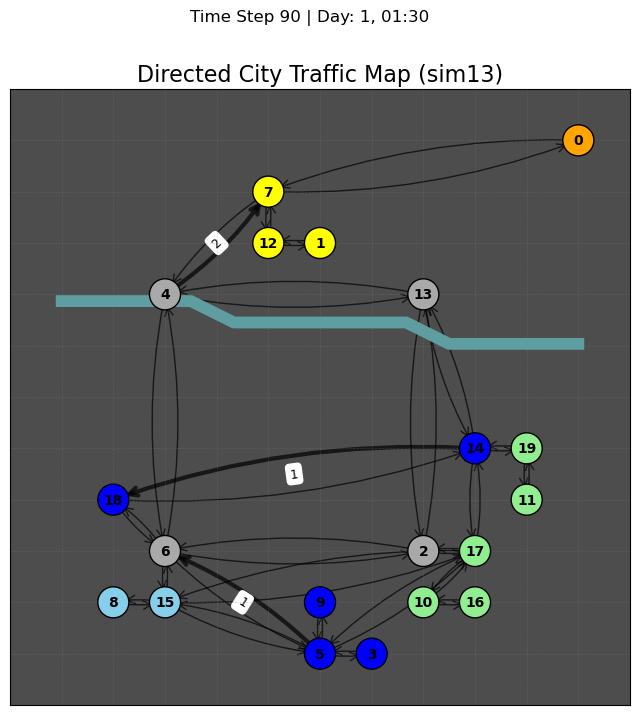

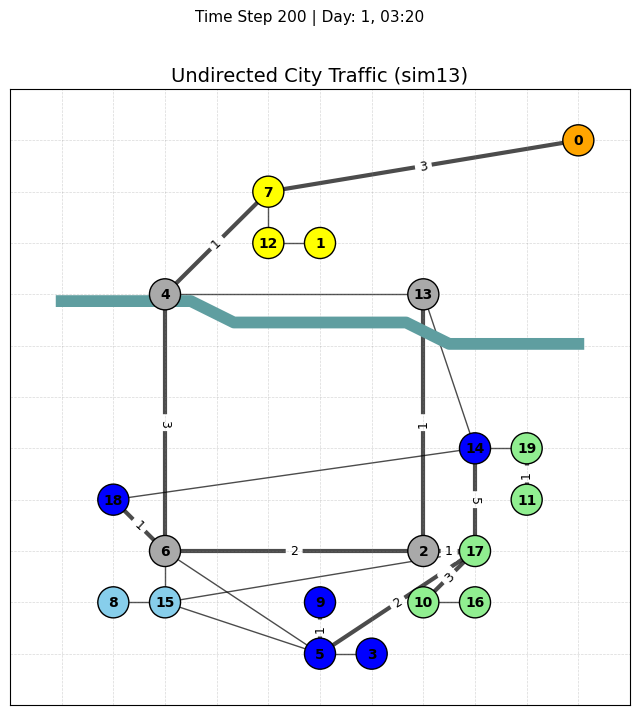

In [10]:
time_step_day = 90 # 1시 30분
plot_city_directed_traffic_sim13(sim13, time_step_day, river_info)

time_step_night = 200 # 3시 20분
plot_city_undirected_traffic_sim13(sim13, time_step_night, river_info)

# smoothening
극단적인 불연속을 줄이기 위해 20 window size에 대한 smoothening을 적용했습니다. 

In [7]:
def causal_movemean_multi(x: np.ndarray, window: int = 20) -> np.ndarray:
    """
    x: (T, E, C) 혹은 (T, ...) 형태의 다차원 시계열 데이터
    window: 과거 window 크기 (현재 스텝 포함)
    반환값: 동일한 shape의 이동평균 시계열 (T, E, C)
    """
    # 1) 앞부분 부족분을 첫 스텝 값으로 패딩
    #    shape_pad = (window-1, E, C)
    pad = np.repeat(x[0:1], repeats=window-1, axis=0)
    
    # 2) 패딩 후 누적합
    x_pad = np.concatenate([pad, x], axis=0)        # shape = (T+window-1, E, C)
    cumsum = x_pad.cumsum(axis=0)                   # shape = (T+window-1, E, C)
    
    # 3) 차분으로 윈도우 합 계산 → 윈도우 크기로 나누어 평균
    movemean = (cumsum[window-1:] - cumsum[:-window+1]) / float(window)
    
    return movemean  # shape = (T, E, C)



In [46]:
# traffic_dataset_13 = np.load(r'../src/dataset/traffic_dataset_13.npy', allow_pickle=True)
traffic_dataset_13 = traffic_dataset_13[:,:,:3] # 채널 3, 4 제거
traffic_dataset_13_smoothen = causal_movemean_multi(traffic_dataset_13, 20)

(10080, 50, 3)
(10080, 50, 3)


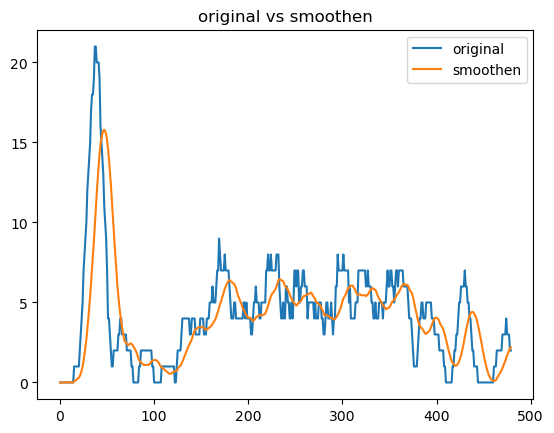

In [47]:
print(traffic_dataset_13.shape)
print(traffic_dataset_13_smoothen.shape)

start = 0
end = 480
E = 0
C = 0
plt.title('original vs smoothen')
plt.plot(traffic_dataset_13[start:end, E, C], label='original')
plt.plot(traffic_dataset_13_smoothen[start:end, E, C], label='smoothen')
plt.legend()
plt.show()

In [48]:
def create_mean(data, week_steps):
    num_weeks = data.shape[0] // week_steps
    mean = np.zeros((week_steps, 50, 3))
    for week in range(num_weeks):
        mean += data[week * week_steps : (week + 1) * week_steps]

    mean /= num_weeks
    return mean

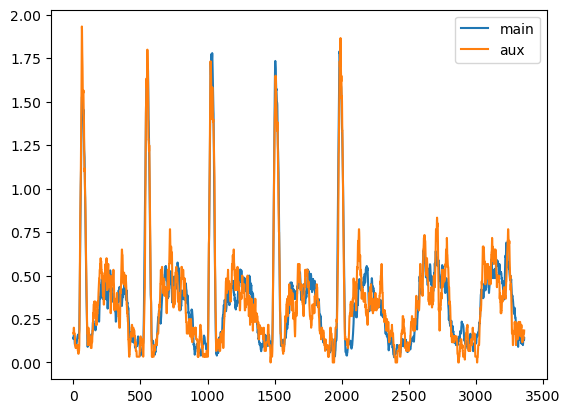

In [55]:
main_dataset = np.load(r'../src/dataset/traffic_dataset_13_smoothen.npy')
main_mean = create_mean(main_dataset, 480*7)
aux_mean = create_mean(traffic_dataset_13_smoothen, 480*7)

# aux, main 비교
edge = 20
channel = 0
plt.plot(main_mean[:,edge,channel], label='main')
plt.plot(aux_mean[:,edge,channel], label='aux')
plt.legend()
plt.show()